### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


### Loading data

In [14]:
train = pd.read_parquet('../data/train.parquet')
test = pd.read_parquet('../data/test.parquet')
sample_submission = pd.read_csv('../data/sample_submission.csv')

In [15]:
train.head()

,id,dates,values,label
0,19114,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....",0.0
1,22769,"[2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...","[-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...",1.0
2,76935,"[2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...","[0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...",0.0
3,66297,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...",0.0
4,2191,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...",0.0


In [16]:
test.head()

,id,dates,values
0,6125,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.85, -0.04, 0.19, -0.45, -0.75, -0.95, -2.91..."
1,26781,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.41, 0.39, -0.47, -0.9, -1.46, -0.51, 0.51,..."
2,13333,"[2016-06-01, 2016-07-01, 2016-08-01, 2016-09-0...","[-0.29, -1.26, 0.17, -1.22, 0.45, -0.94, 0.16,..."
3,53218,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.47, 1.55, -0.03, 0.57, -0.57, 0.6, 0.27, 1..."
4,84204,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[2.33, 1.39, -1.03, -2.64, 1.89, 1.77, 1.43, 1..."


In [17]:
#Checking dataframe's shape
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')

train shape: (80000, 4)
test shape: (20000, 3)


In [18]:
unique_values = train['label'].unique()
print(unique_values)

[0. 1.]


<Axes: xlabel='label'>

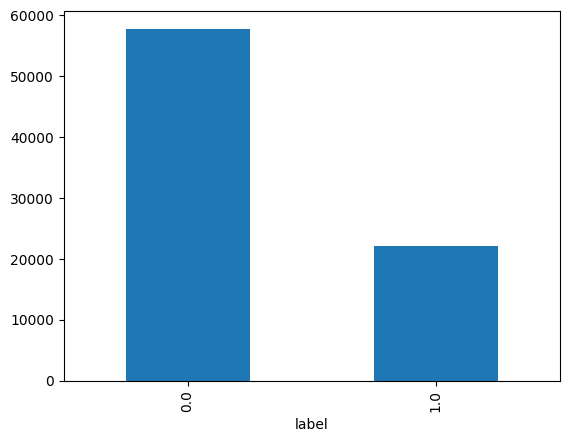

In [19]:
train['label'].value_counts().plot(kind='bar')

In [20]:
class_counts = train['label'].value_counts(normalize=True) * 100
print(class_counts)

label
0.0    72.275
1.0    27.725
Name: proportion, dtype: float64


### Data types, missing values, duplicates

In [21]:
#Checking column's datatype
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [22]:
train['values'] = train['values'].apply(lambda x: list(map(float, x)))

In [23]:
print(train.head())
print(train.dtypes)

      id                                              dates  \
0  19114  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
1  22769  [2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...   
2  76935  [2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...   
3  66297  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
4   2191  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   

                                              values  label  
0  [-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....    0.0  
1  [-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...    1.0  
2  [0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...    0.0  
3  [-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...    0.0  
4  [1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...    0.0  
id          int64
dates      object
values     object
label     float64
dtype: object


In [2]:
def extract_features(data):
    features = pd.DataFrame()
    features['mean'] = data['values'].apply(np.mean)
    features['std'] = data['values'].apply(np.std)
    features['min'] = data['values'].apply(np.min)
    features['max'] = data['values'].apply(np.max)
    features['median'] = data['values'].apply(np.median)
    features['label'] = data['label']
    return features

features = extract_features(train)

NameError: name 'train' is not defined

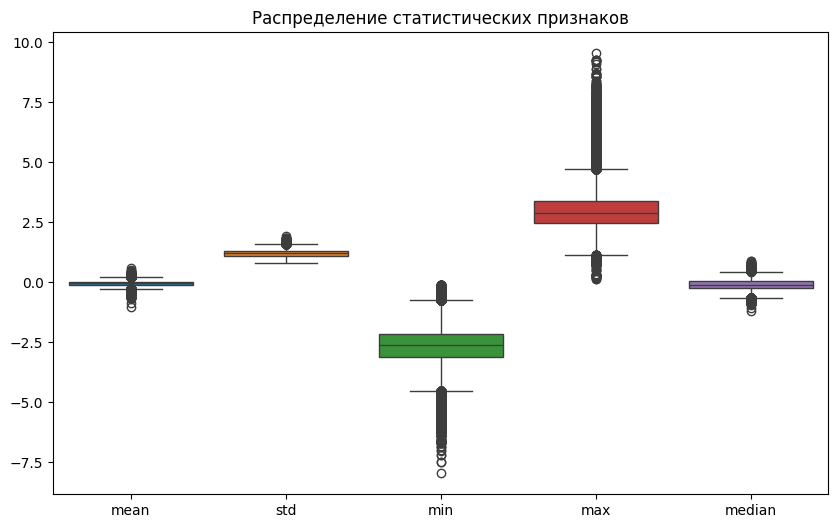

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features.drop(columns='label'))
plt.title('Распределение статистических признаков')
plt.show()

In [ ]:
statistic_features = ['']

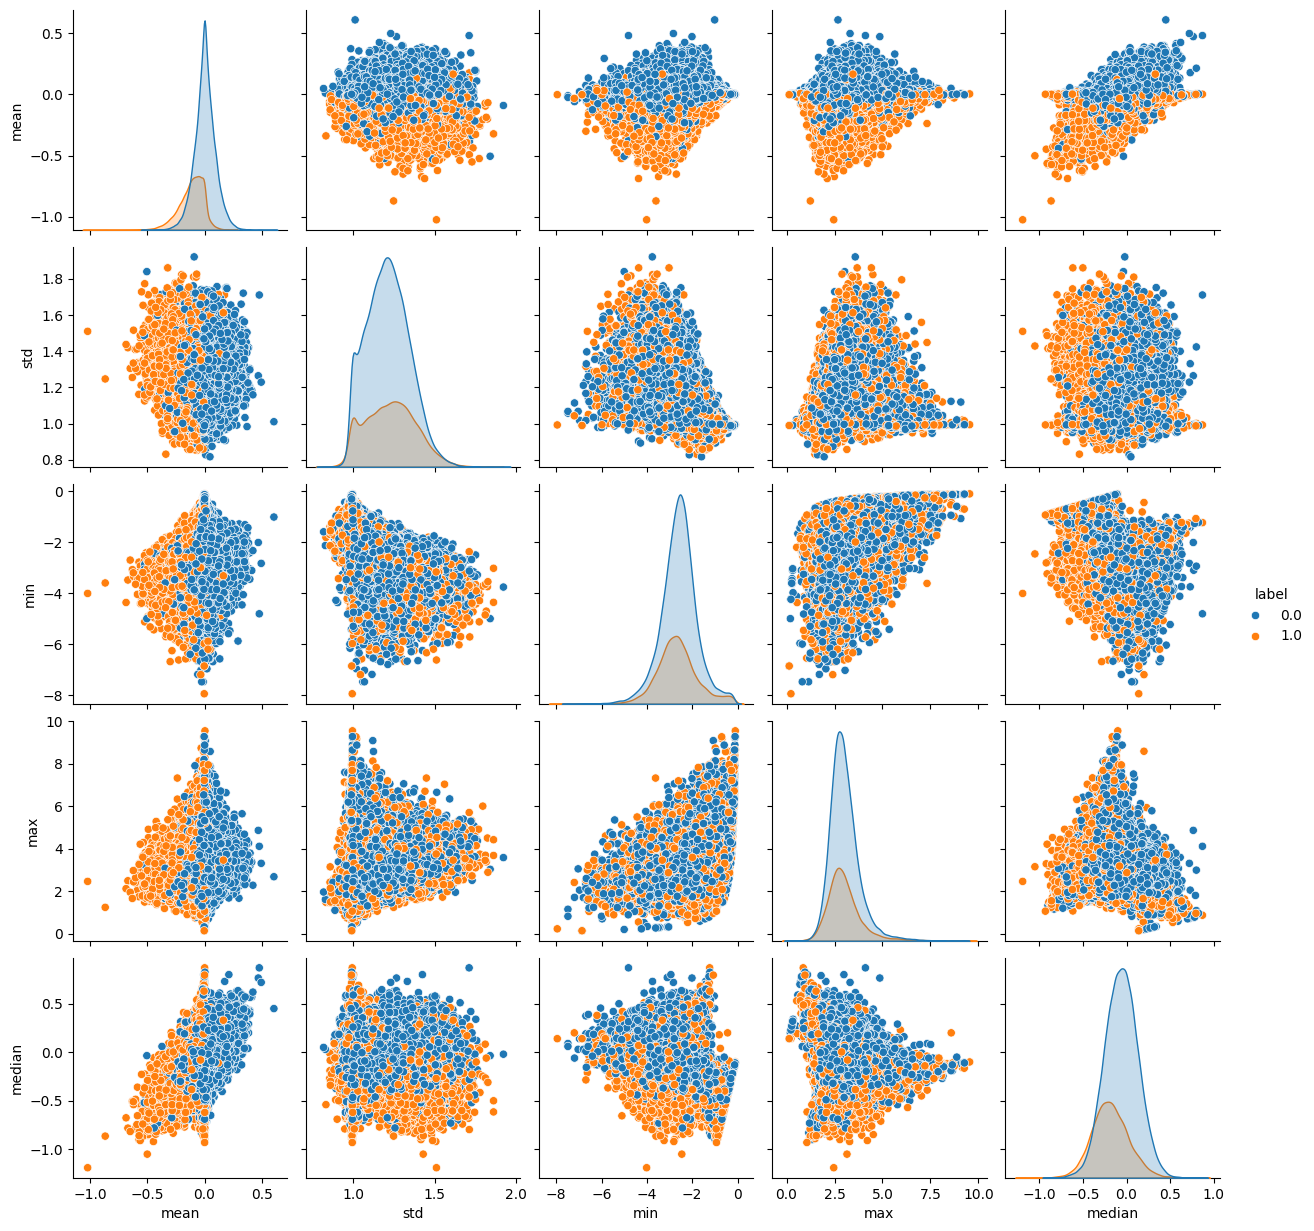

In [13]:
# Парные графики для анализа взаимосвязи признаков
sns.pairplot(features, hue='label')
plt.show()

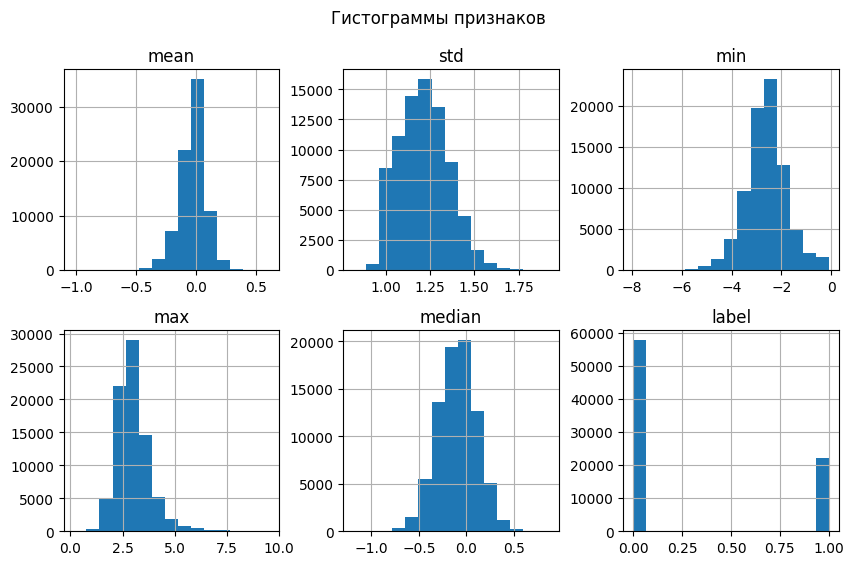

In [14]:
# Гистограммы для распределения признаков
features.hist(bins=15, figsize=(10, 6), layout=(2, 3))
plt.suptitle('Гистограммы признаков')
plt.show()

In [32]:
# "Взрыв" данных - каждый элемент списка станет отдельной строкой
data_exploded = train.explode(['dates', 'values'])

# Преобразование столбца 'dates' в формат datetime
data_exploded['dates'] = pd.to_datetime(data_exploded['dates'])

# Удаление дубликатов, если необходимо
data_exploded_unique = data_exploded.drop_duplicates()

In [35]:
duplicates = data_exploded_unique.duplicated(subset=['id', 'dates'], keep=False)
print(data_exploded_unique[duplicates])

Empty DataFrame
Columns: [id, dates, values, label]
Index: []


In [36]:
data_exploded_unique = data_exploded_unique.drop_duplicates(subset=['id', 'dates'])

data_exploded_unique = data_exploded_unique.groupby(['id', 'dates'], as_index=False).agg({'values': 'mean'})

/home/alisadmitr/VK/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


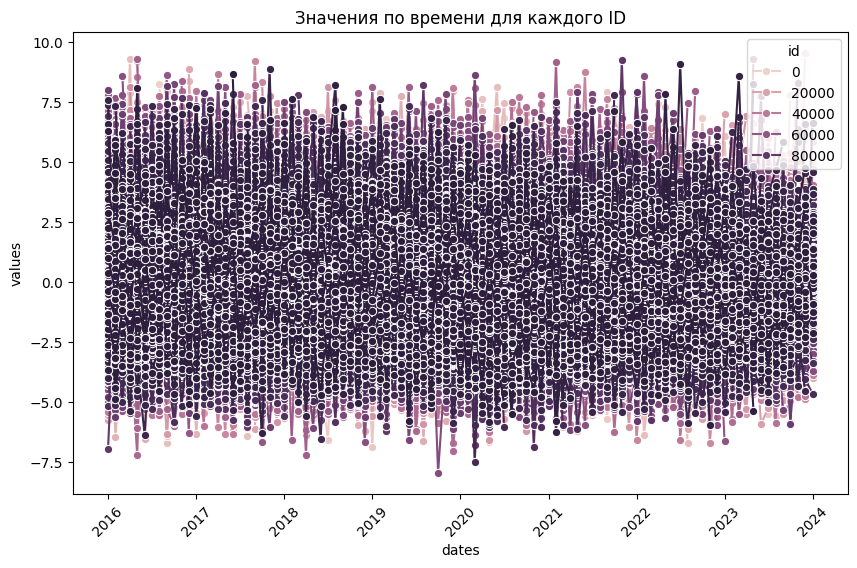

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='dates', y='values', hue='id', data=data_exploded_unique, marker="o")
plt.title('Значения по времени для каждого ID')
plt.xticks(rotation=45)
plt.show()

In [39]:
print(data_exploded_unique.columns)

Index(['id', 'dates', 'values'], dtype='object')


In [41]:
print(train['label'].apply(type).unique())

[<class 'float'>]


In [44]:
train['label'] = train['label'].apply(lambda x: x[0] if isinstance(x, list) else x)
train['label'] = train['label'].astype('category')

TypeError: unhashable type: 'list'

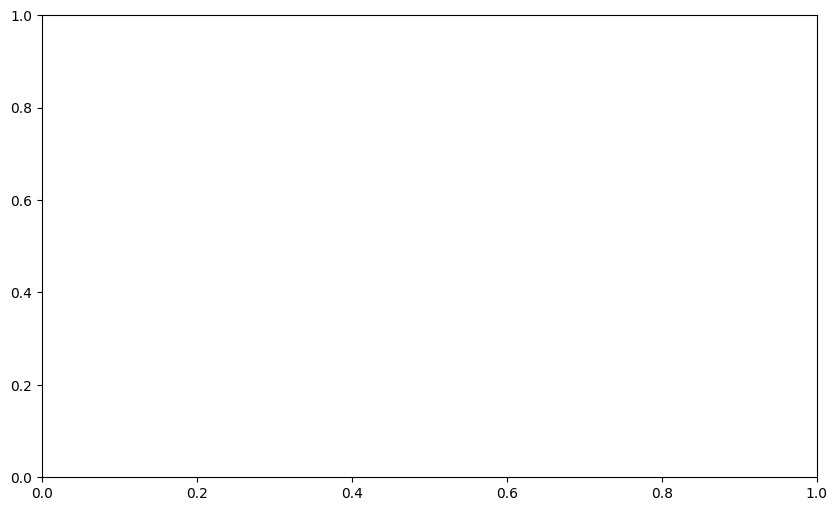

In [46]:
# Boxplot для распределения значений по меткам классов
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='values', data=train)
plt.title('Распределение значений по меткам классов')
plt.show()

In [47]:
# Распределение значений по датам
plt.figure(figsize=(10, 6))
sns.histplot(data=data_exploded_unique, x='dates', hue='label', kde=True)
plt.title('Распределение значений по датам')
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `label` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

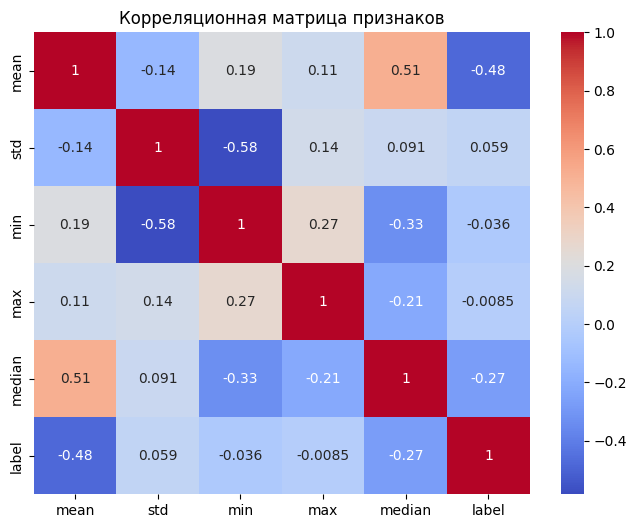

In [50]:
# Heatmap корреляции статистических признаков
features = extract_features(train)
corr = features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [51]:
# change time column into datetime format
train['dates'] = train['dates'].apply(pd.to_datetime)
test['dates'] = test['dates'].apply(pd.to_datetime)

In [52]:
# it is easier to work with a percentage ratio of missing values
def percentage_ratio(data):
    datatype = pd.DataFrame(data.dtypes,columns=["Data Type"])
    datatype["Missing Values"]=data.isnull().sum()
    datatype["% Missing Values"]=data.isnull().sum()/len(data)*100
    return datatype.sort_values(by="% Missing Values", ascending=False)

In [53]:
percentage_ratio(train)

,Data Type,Missing Values,% Missing Values
id,int64,0,0.0
dates,object,0,0.0
values,object,0,0.0
label,category,0,0.0


In [54]:
percentage_ratio(test)

,Data Type,Missing Values,% Missing Values
id,int64,0,0.0
dates,object,0,0.0
values,object,0,0.0


### Features Engineering

#### Convert data to 

In [61]:
def time_features(data):
    data['day'] = data['dates'].dt.day
    data['year'] = data['dates'].dt.year
    data['month'] = data['dates'].dt.month
    return data

In [63]:
print(train['dates'].dtype)


object


In [64]:
train['dates'] = pd.to_datetime(train['dates'], errors='coerce')


In [65]:
print(train['dates'].dtype)  # Должен быть datetime64[ns]


datetime64[ns]


In [67]:
print(train['dates'].dtype)  # Должно быть datetime64[ns]
print(train['dates'].unique())  # Посмотрите на уникальные значения


datetime64[ns]
<DatetimeArray>
['NaT']
Length: 1, dtype: datetime64[ns]


In [66]:
time_features(train)
time_features(test)

AttributeError: Can only use .dt accessor with datetimelike values